# PHYS 641 - HW#1

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import quad
from sympy import symbols, solve

## Problem 2

Text(0, 0.5, 'Filter Sensitivity')

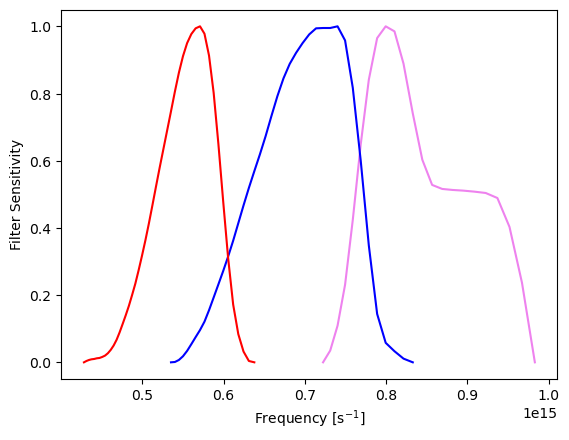

In [2]:
#Calculate everything in cgs units
#distance=cm
#mass=grams
#time=seconds
#temperature=Kelvin
#energy=ergs

#1erg= cm+2⋅g⋅s−2

c=2.9979e+10 #cm / s
h=6.6261e-27 #cm+2 g / s
k=1.3807e-16 #erg / K
stef=5.6704e-5 #erg cm+2 K+4 / s
solmass=1.989e+33 #g
sollum=3.839e+33 #erg / s
soltemp=5778 #K
parsec=3.086e+18 #cm
nm=1e-7 #cm
d=10*parsec #cm
width=5*nm #cm

def B3(v):
    return (2*h*v**3/c**2)/(np.exp(h*v/(k*3000))-1) 

def B6(v):
    return (2*h*v**3/c**2)/(np.exp(h*v/(k*6000))-1) 

def B10(v):
    return (2*h*v**3/c**2)/(np.exp(h*v/(k*10000))-1) 

def B15(v):
    return (2*h*v**3/c**2)/(np.exp(h*v/(k*15000))-1) 

width=5*nm #Angstroms



baseU = float(305*nm) #Angstroms
UWave = []
B3_U=[]
B6_U=[]
B10_U=[]
B15_U=[]
hv_U=[]

for i  in range(0,23):
  UWave.append(c/(baseU + (float(i)*width)))
  B3_U.append(B3(c/(baseU + (float(i)*width))))
  B6_U.append(B6(c/(baseU + (float(i)*width))))
  B10_U.append(B10(c/(baseU + (float(i)*width))))
  B15_U.append(B15(c/(baseU + (float(i)*width))))
  hv_U.append(h*c/(baseU + (float(i)*width)))  
    
USens = [0,0.237,0.403,0.489,0.504,0.508,0.511,0.513,0.516,0.528,0.603,0.741,0.889,0.985,1,0.965,0.841,0.648,0.424,0.231,0.109,0.035,0]




baseB = float(360*nm)
BWave = []
B3_B=[]
B6_B=[]
B10_B=[]
B15_B=[]
hv_B=[]


for i  in range(0,41):
  BWave.append(c/(baseB + (float(i)*width)))
  B3_B.append(B3(c/(baseB + (float(i)*width))))
  B6_B.append(B6(c/(baseB + (float(i)*width))))
  B10_B.append(B10(c/(baseB + (float(i)*width))))
  B15_B.append(B15(c/(baseB + (float(i)*width))))
  hv_B.append(h*c/(baseB + (float(i)*width)))  
    
BSens = [0,0.011,0.033,0.058,0.144,0.348,0.601,0.817,0.958,1,0.995,0.995,0.994,0.976,0.95,0.921,0.888,0.845,0.792,0.733,0.673,0.619,0.569,0.519,0.467,0.414,0.362,0.315,0.272,0.232,0.193,0.155,0.121,0.096,0.075,0.054,0.034,0.018,0.007,0.001,0]




baseV = float(470*nm)
VWave = []
B3_V=[]
B6_V=[]
B10_V=[]
B15_V=[]
hv_V=[]

for i  in range(0,47):
  VWave.append(c/(baseV + (float(i)*width)))
  B3_V.append(B3(c/(baseV + (float(i)*width))))
  B6_V.append(B6(c/(baseV + (float(i)*width))))
  B10_V.append(B10(c/(baseV + (float(i)*width))))
  B15_V.append(B15(c/(baseV + (float(i)*width))))
  hv_V.append(h*c/(baseV + (float(i)*width)))  

VSens = [0,0.004,0.032,0.084,0.172,0.31,0.478,0.65,0.802,0.913,0.978,1,0.994,0.977,0.95,0.911,0.862,0.806,0.747,0.69,0.634,0.579,0.523,0.467,0.413,0.363,0.317,0.274,0.234,0.2,0.168,0.14,0.114,0.089,0.067,0.05,0.037,0.027,0.02,0.016,0.013,0.012,0.01,0.009,0.007,0.004,0]

plt.plot(UWave, USens, color="violet")
plt.plot(BWave, BSens, color="blue")
plt.plot(VWave, VSens, color="red")
plt.xlabel("Frequency [s$^{-1}$]")
plt.ylabel("Filter Sensitivity")

Text(0.5, 1.0, 'Blackbody Spectrum at 3000K')

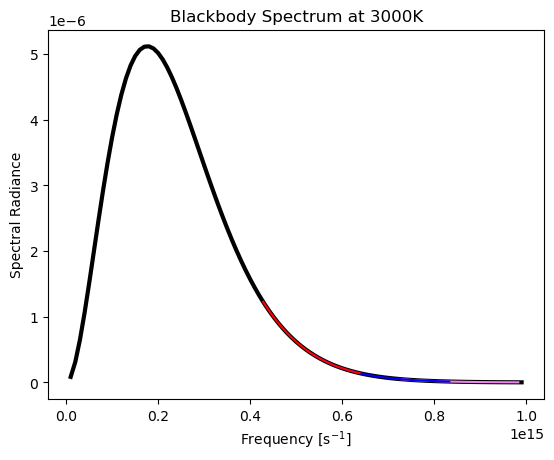

In [3]:
BlackB = np.arange(0.01e+15,1e+15, 1e+13)
plt.plot(BlackB, B3(BlackB), linewidth=3, color="black")
plt.plot(UWave, B3_U, color="violet")
plt.plot(BWave, B3_B, color="blue")
plt.plot(VWave, B3_V, color="red")
plt.xlabel("Frequency [s$^{-1}$]")
plt.ylabel("Spectral Radiance")
plt.title("Blackbody Spectrum at 3000K")

U-B at 3000K= 1.906521632791004
B-V at 3000K= 1.578657927815704
U-B at 6000K= 0.6457905905128452
B-V at 6000K= 0.48048675941825386
U-B at 10000K= 0.15848373947024705
B-V at 10000K= 0.03517416484853194
U-B at 15000K= -0.06829984484675784
B-V at 15000K= -0.17111727397537194


(-1.5, 2.0)

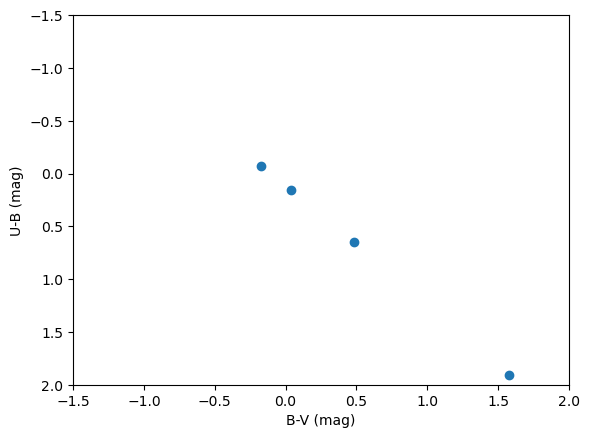

In [4]:
NumInt_B3_U =  np.divide(np.multiply(B3_U,USens),hv_U)
DemInt_B3_U =  np.divide(USens,hv_U)
AV_B3_U = integrate.simps(NumInt_B3_U, UWave, even='avg')/integrate.simps(DemInt_B3_U, UWave, even='avg')

NumInt_B3_B =  np.divide(np.multiply(B3_B,BSens),hv_B)
DemInt_B3_B =  np.divide(BSens,hv_B)
AV_B3_B = integrate.simps(NumInt_B3_B, BWave, even='avg')/integrate.simps(DemInt_B3_B, BWave, even='avg')

NumInt_B3_V =  np.divide(np.multiply(B3_V,VSens),hv_V)
DemInt_B3_V =  np.divide(VSens,hv_V)
AV_B3_V = integrate.simps(NumInt_B3_V, VWave, even='avg')/integrate.simps(DemInt_B3_V, VWave, even='avg')

U_B_B3=-2.5*np.log10(AV_B3_U/AV_B3_B)
B_V_B3=-2.5*np.log10(AV_B3_B/AV_B3_V)
U_V_B3=-2.5*np.log10(AV_B3_U/AV_B3_V)

################

NumInt_B6_U =  np.divide(np.multiply(B6_U,USens),hv_U)
DemInt_B6_U =  np.divide(USens,hv_U)
AV_B6_U = integrate.simps(NumInt_B6_U, UWave, even='avg')/integrate.simps(DemInt_B6_U, UWave, even='avg')

NumInt_B6_B =  np.divide(np.multiply(B6_B,BSens),hv_B)
DemInt_B6_B =  np.divide(BSens,hv_B)
AV_B6_B = integrate.simps(NumInt_B6_B, BWave, even='avg')/integrate.simps(DemInt_B6_B, BWave, even='avg')

NumInt_B6_V =  np.divide(np.multiply(B6_V,VSens),hv_V)
DemInt_B6_V =  np.divide(VSens,hv_V)
AV_B6_V = integrate.simps(NumInt_B6_V, VWave, even='avg')/integrate.simps(DemInt_B6_V, VWave, even='avg')

U_B_B6=-2.5*np.log10(AV_B6_U/AV_B6_B)
B_V_B6=-2.5*np.log10(AV_B6_B/AV_B6_V)
U_V_B6=-2.5*np.log10(AV_B6_U/AV_B6_V)

##################

NumInt_B10_U =  np.divide(np.multiply(B10_U,USens),hv_U)
DemInt_B10_U =  np.divide(USens,hv_U)
AV_B10_U = integrate.simps(NumInt_B10_U, UWave, even='avg')/integrate.simps(DemInt_B10_U, UWave, even='avg')

NumInt_B10_B =  np.divide(np.multiply(B10_B,BSens),hv_B)
DemInt_B10_B =  np.divide(BSens,hv_B)
AV_B10_B = integrate.simps(NumInt_B10_B, BWave, even='avg')/integrate.simps(DemInt_B10_B, BWave, even='avg')

NumInt_B10_V =  np.divide(np.multiply(B10_V,VSens),hv_V)
DemInt_B10_V =  np.divide(VSens,hv_V)
AV_B10_V = integrate.simps(NumInt_B10_V, VWave, even='avg')/integrate.simps(DemInt_B10_V, VWave, even='avg')

U_B_B10=-2.5*np.log10(AV_B10_U/AV_B10_B)
B_V_B10=-2.5*np.log10(AV_B10_B/AV_B10_V)
U_V_B10=-2.5*np.log10(AV_B10_U/AV_B10_V)

##################

NumInt_B15_U =  np.divide(np.multiply(B15_U,USens),hv_U)
DemInt_B15_U =  np.divide(USens,hv_U)
AV_B15_U = integrate.simps(NumInt_B15_U, UWave, even='avg')/integrate.simps(DemInt_B15_U, UWave, even='avg')

NumInt_B15_B =  np.divide(np.multiply(B15_B,BSens),hv_B)
DemInt_B15_B =  np.divide(BSens,hv_B)
AV_B15_B = integrate.simps(NumInt_B15_B, BWave, even='avg')/integrate.simps(DemInt_B15_B, BWave, even='avg')

NumInt_B15_V =  np.divide(np.multiply(B15_V,VSens),hv_V)
DemInt_B15_V =  np.divide(VSens,hv_V)
AV_B15_V = integrate.simps(NumInt_B15_V, VWave, even='avg')/integrate.simps(DemInt_B15_V, VWave, even='avg')

U_B_B15=-2.5*np.log10(AV_B15_U/AV_B15_B)
B_V_B15=-2.5*np.log10(AV_B15_B/AV_B15_V)
U_V_B15=-2.5*np.log10(AV_B15_U/AV_B15_V)

print("U-B at 3000K= " + str(U_B_B3))
print("B-V at 3000K= " + str(B_V_B3))
print("U-B at 6000K= " + str(U_B_B6))
print("B-V at 6000K= " + str(B_V_B6))
print("U-B at 10000K= " + str(U_B_B10))
print("B-V at 10000K= " + str(B_V_B10))
print("U-B at 15000K= " + str(U_B_B15))
print("B-V at 15000K= " + str(B_V_B15))

BVarr=[B_V_B3,B_V_B6,B_V_B10,B_V_B15]
UBarr=[U_B_B3,U_B_B6,U_B_B10,U_B_B15]
plt.scatter(BVarr,UBarr)
plt.xlabel("B-V (mag)")
plt.ylabel("U-B (mag)")
plt.ylim([2, -1.5])
plt.xlim([-1.5, 2])

U-B for M0V= 2.083285384538068
B-V for M0V= 1.305895260553832


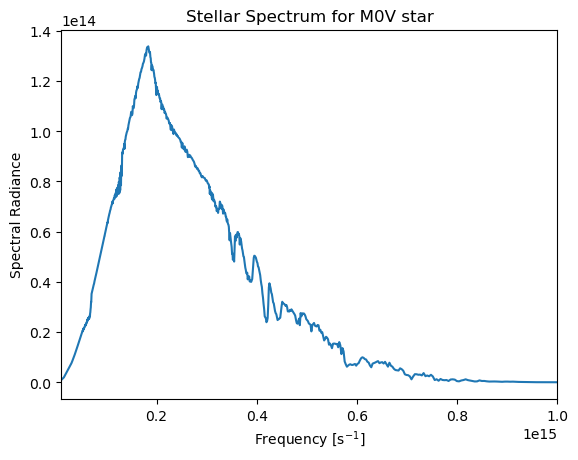

In [5]:
# Type    T_{eff}    log_g       Kurucz model
# M0V       3850     +4.59       kp00_3750[g45] 
# K5V       4350     +4.54       kp00_4250[g45]
# K0V       5250     +4.49       kp00_5250[g45]
# G5V       5770     +4.49       kp00_5750[g45]
# G0V       6030     +4.39       kp00_6000[g45] 
# F5V       6440     +4.34       kp00_6500[g45]
# F0V       7200     +4.34       kp00_7250[g45] 
# A5V       8200     +4.29       kp00_8250[g45]
# A0V       9520     +4.14       kp00_9500[g40] 
# B8V      11900     +4.04      kp00_12000[g40] 
# B3V      18700     +3.94      kp00_19000[g40]

from astropy.io import fits
from astropy.table import Table
 
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_3750.fits') as kp00_3750:
    kp00_3750_table = Table(kp00_3750[1].data)
M0V_wave = np.array(kp00_3750_table['WAVELENGTH'])
M0V_spec = np.array(kp00_3750_table['g45'])
M0V_spec = np.multiply(M0V_spec,np.multiply(M0V_wave,M0V_wave))
M0V_wave = 10*c/(nm*M0V_wave)

plt.plot(M0V_wave, M0V_spec)
plt.xlim(0.01e+15,1e+15)
plt.xlabel("Frequency [s$^{-1}$]")
plt.ylabel("Spectral Radiance")
plt.title("Stellar Spectrum for M0V star")

M0V_U=[]
M0V_B=[]
M0V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(M0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    M0V_U.append(M0V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(M0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    M0V_B.append(M0V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(M0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    M0V_V.append(M0V_spec[nearest_val_index])    

NumInt_M0V_U =  np.divide(np.multiply(M0V_U,USens),hv_U)
DemInt_M0V_U =  np.divide(USens,hv_U)
AV_M0V_U = integrate.simps(NumInt_M0V_U, UWave, even='avg')/integrate.simps(DemInt_M0V_U, UWave, even='avg')

NumInt_M0V_B =  np.divide(np.multiply(M0V_B,BSens),hv_B)
DemInt_M0V_B =  np.divide(BSens,hv_B)
AV_M0V_B = integrate.simps(NumInt_M0V_B, BWave, even='avg')/integrate.simps(DemInt_M0V_B, BWave, even='avg')

NumInt_M0V_V =  np.divide(np.multiply(M0V_V,VSens),hv_V)
DemInt_M0V_V =  np.divide(VSens,hv_V)
AV_M0V_V = integrate.simps(NumInt_M0V_V, VWave, even='avg')/integrate.simps(DemInt_M0V_V, VWave, even='avg')

U_B_M0V=-2.5*np.log10(AV_M0V_U/AV_M0V_B)
B_V_M0V=-2.5*np.log10(AV_M0V_B/AV_M0V_V)
U_V_M0V=-2.5*np.log10(AV_M0V_U/AV_M0V_V)  

print("U-B for M0V= " + str(U_B_M0V))
print("B-V for M0V= " + str(B_V_M0V))

U-B for K5V= 2.0428390796801117
B-V for K5V= 1.1357780739057857


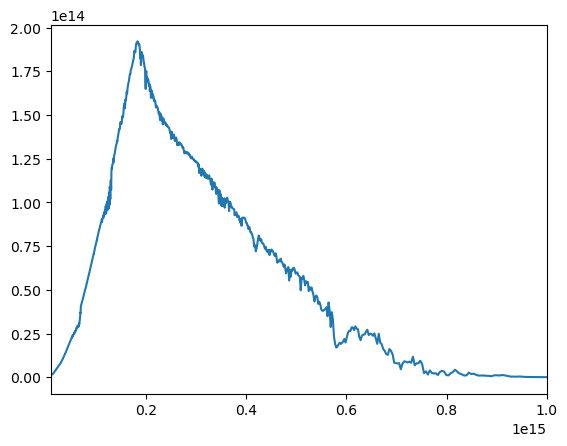

In [6]:
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_4250.fits') as kp00_4250:
    kp00_4250_table = Table(kp00_4250[1].data)
K5V_wave = np.array(kp00_4250_table['WAVELENGTH'])
K5V_spec = np.array(kp00_4250_table['g45'])
K5V_spec = np.multiply(K5V_spec,np.multiply(K5V_wave,K5V_wave))
K5V_wave = 10*c/(nm*K5V_wave)

plt.plot(K5V_wave, K5V_spec)
plt.xlim(0.01e+15,1e+15)

K5V_U=[]
K5V_B=[]
K5V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(K5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    K5V_U.append(K5V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(K5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    K5V_B.append(K5V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(K5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    K5V_V.append(K5V_spec[nearest_val_index])    

NumInt_K5V_U =  np.divide(np.multiply(K5V_U,USens),hv_U)
DemInt_K5V_U =  np.divide(USens,hv_U)
AV_K5V_U = integrate.simps(NumInt_K5V_U, UWave, even='avg')/integrate.simps(DemInt_K5V_U, UWave, even='avg')

NumInt_K5V_B =  np.divide(np.multiply(K5V_B,BSens),hv_B)
DemInt_K5V_B =  np.divide(BSens,hv_B)
AV_K5V_B = integrate.simps(NumInt_K5V_B, BWave, even='avg')/integrate.simps(DemInt_K5V_B, BWave, even='avg')

NumInt_K5V_V =  np.divide(np.multiply(K5V_V,VSens),hv_V)
DemInt_K5V_V =  np.divide(VSens,hv_V)
AV_K5V_V = integrate.simps(NumInt_K5V_V, VWave, even='avg')/integrate.simps(DemInt_K5V_V, VWave, even='avg')

U_B_K5V=-2.5*np.log10(AV_K5V_U/AV_K5V_B)
B_V_K5V=-2.5*np.log10(AV_K5V_B/AV_K5V_V)
U_V_K5V=-2.5*np.log10(AV_K5V_U/AV_K5V_V)  

print("U-B for K5V= " + str(U_B_K5V))
print("B-V for K5V= " + str(B_V_K5V))

U-B for K0V= 1.2592515802056339
B-V for K0V= 0.7429408833394496


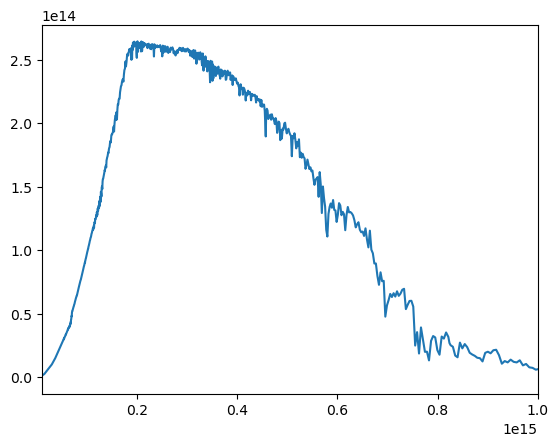

In [7]:
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_5250.fits') as kp00_5250:
    kp00_5250_table = Table(kp00_5250[1].data)
K0V_wave = np.array(kp00_5250_table['WAVELENGTH'])
K0V_spec = np.array(kp00_5250_table['g45'])
K0V_spec = np.multiply(K0V_spec,np.multiply(K0V_wave,K0V_wave))
K0V_wave = 10*c/(nm*K0V_wave)

plt.plot(K0V_wave, K0V_spec)
plt.xlim(0.01e+15,1e+15)

K0V_U=[]
K0V_B=[]
K0V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(K0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    K0V_U.append(K0V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(K0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    K0V_B.append(K0V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(K0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    K0V_V.append(K0V_spec[nearest_val_index])    

NumInt_K0V_U =  np.divide(np.multiply(K0V_U,USens),hv_U)
DemInt_K0V_U =  np.divide(USens,hv_U)
AV_K0V_U = integrate.simps(NumInt_K0V_U, UWave, even='avg')/integrate.simps(DemInt_K0V_U, UWave, even='avg')

NumInt_K0V_B =  np.divide(np.multiply(K0V_B,BSens),hv_B)
DemInt_K0V_B =  np.divide(BSens,hv_B)
AV_K0V_B = integrate.simps(NumInt_K0V_B, BWave, even='avg')/integrate.simps(DemInt_K0V_B, BWave, even='avg')

NumInt_K0V_V =  np.divide(np.multiply(K0V_V,VSens),hv_V)
DemInt_K0V_V =  np.divide(VSens,hv_V)
AV_K0V_V = integrate.simps(NumInt_K0V_V, VWave, even='avg')/integrate.simps(DemInt_K0V_V, VWave, even='avg')

U_B_K0V=-2.5*np.log10(AV_K0V_U/AV_K0V_B)
B_V_K0V=-2.5*np.log10(AV_K0V_B/AV_K0V_V)
U_V_K0V=-2.5*np.log10(AV_K0V_U/AV_K0V_V)  

print("U-B for K0V= " + str(U_B_K0V))
print("B-V for K0V= " + str(B_V_K0V))

U-B for G5V= 0.9789479207539868
B-V for G5V= 0.5791298363360093


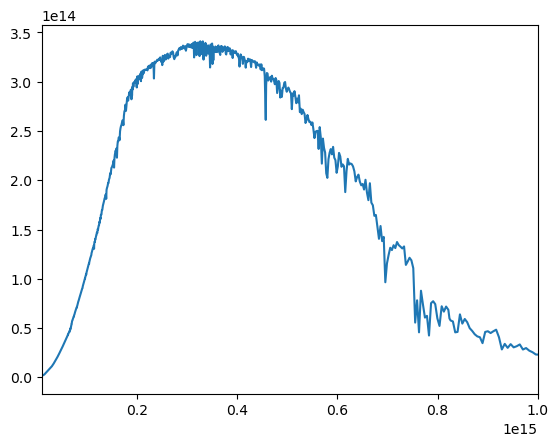

In [8]:
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_5750.fits') as kp00_5750:
    kp00_5750_table = Table(kp00_5750[1].data)
G5V_wave = np.array(kp00_5750_table['WAVELENGTH'])
G5V_spec = np.array(kp00_5750_table['g45'])
G5V_spec = np.multiply(G5V_spec,np.multiply(G5V_wave,G5V_wave))
G5V_wave = 10*c/(nm*G5V_wave)

plt.plot(G5V_wave, G5V_spec)
plt.xlim(0.01e+15,1e+15)

G5V_U=[]
G5V_B=[]
G5V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(G5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    G5V_U.append(G5V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(G5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    G5V_B.append(G5V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(G5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    G5V_V.append(G5V_spec[nearest_val_index])    

NumInt_G5V_U =  np.divide(np.multiply(G5V_U,USens),hv_U)
DemInt_G5V_U =  np.divide(USens,hv_U)
AV_G5V_U = integrate.simps(NumInt_G5V_U, UWave, even='avg')/integrate.simps(DemInt_G5V_U, UWave, even='avg')

NumInt_G5V_B =  np.divide(np.multiply(G5V_B,BSens),hv_B)
DemInt_G5V_B =  np.divide(BSens,hv_B)
AV_G5V_B = integrate.simps(NumInt_G5V_B, BWave, even='avg')/integrate.simps(DemInt_G5V_B, BWave, even='avg')

NumInt_G5V_V =  np.divide(np.multiply(G5V_V,VSens),hv_V)
DemInt_G5V_V =  np.divide(VSens,hv_V)
AV_G5V_V = integrate.simps(NumInt_G5V_V, VWave, even='avg')/integrate.simps(DemInt_G5V_V, VWave, even='avg')

U_B_G5V=-2.5*np.log10(AV_G5V_U/AV_G5V_B)
B_V_G5V=-2.5*np.log10(AV_G5V_B/AV_G5V_V)
U_V_G5V=-2.5*np.log10(AV_G5V_U/AV_G5V_V)  

print("U-B for G5V= " + str(U_B_G5V))
print("B-V for G5V= " + str(B_V_G5V))

U-B for G0V= 0.8807459647411877
B-V for G0V= 0.5029068685037905


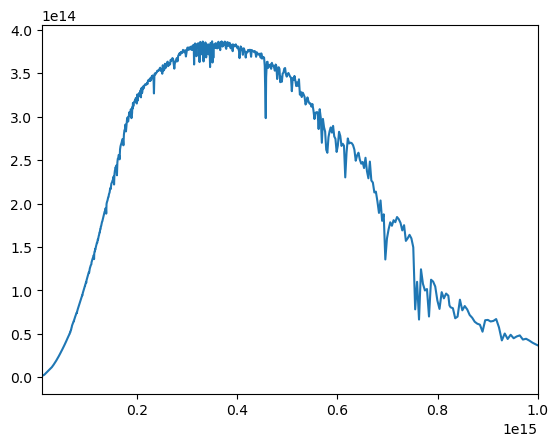

In [9]:
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_6000.fits') as kp00_6000:
    kp00_6000_table = Table(kp00_6000[1].data)
G0V_wave = np.array(kp00_6000_table['WAVELENGTH'])
G0V_spec = np.array(kp00_6000_table['g45'])
G0V_spec = np.multiply(G0V_spec,np.multiply(G0V_wave,G0V_wave))
G0V_wave = 10*c/(nm*G0V_wave)

plt.plot(G0V_wave, G0V_spec)
plt.xlim(0.01e+15,1e+15)

G0V_U=[]
G0V_B=[]
G0V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(G0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    G0V_U.append(G0V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(G0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    G0V_B.append(G0V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(G0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    G0V_V.append(G0V_spec[nearest_val_index])    

NumInt_G0V_U =  np.divide(np.multiply(G0V_U,USens),hv_U)
DemInt_G0V_U =  np.divide(USens,hv_U)
AV_G0V_U = integrate.simps(NumInt_G0V_U, UWave, even='avg')/integrate.simps(DemInt_G0V_U, UWave, even='avg')

NumInt_G0V_B =  np.divide(np.multiply(G0V_B,BSens),hv_B)
DemInt_G0V_B =  np.divide(BSens,hv_B)
AV_G0V_B = integrate.simps(NumInt_G0V_B, BWave, even='avg')/integrate.simps(DemInt_G0V_B, BWave, even='avg')

NumInt_G0V_V =  np.divide(np.multiply(G0V_V,VSens),hv_V)
DemInt_G0V_V =  np.divide(VSens,hv_V)
AV_G0V_V = integrate.simps(NumInt_G0V_V, VWave, even='avg')/integrate.simps(DemInt_G0V_V, VWave, even='avg')

U_B_G0V=-2.5*np.log10(AV_G0V_U/AV_G0V_B)
B_V_G0V=-2.5*np.log10(AV_G0V_B/AV_G0V_V)
U_V_G0V=-2.5*np.log10(AV_G0V_U/AV_G0V_V)  

print("U-B for G0V= " + str(U_B_G0V))
print("B-V for G0V= " + str(B_V_G0V))

U-B for F5V= 0.763577874413749
B-V for F5V= 0.370152592710491


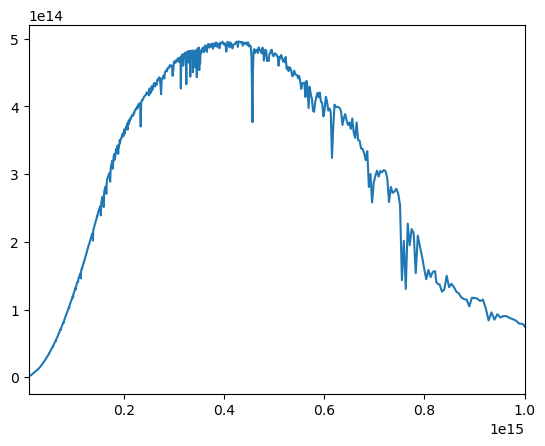

In [10]:
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_6500.fits') as kp00_6500:
    kp00_6500_table = Table(kp00_6500[1].data)
F5V_wave = np.array(kp00_6500_table['WAVELENGTH'])
F5V_spec = np.array(kp00_6500_table['g45'])
F5V_spec = np.multiply(F5V_spec,np.multiply(F5V_wave,F5V_wave))
F5V_wave = 10*c/(nm*F5V_wave)

plt.plot(F5V_wave, F5V_spec)
plt.xlim(0.01e+15,1e+15)

F5V_U=[]
F5V_B=[]
F5V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(F5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    F5V_U.append(F5V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(F5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    F5V_B.append(F5V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(F5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    F5V_V.append(F5V_spec[nearest_val_index])    

NumInt_F5V_U =  np.divide(np.multiply(F5V_U,USens),hv_U)
DemInt_F5V_U =  np.divide(USens,hv_U)
AV_F5V_U = integrate.simps(NumInt_F5V_U, UWave, even='avg')/integrate.simps(DemInt_F5V_U, UWave, even='avg')

NumInt_F5V_B =  np.divide(np.multiply(F5V_B,BSens),hv_B)
DemInt_F5V_B =  np.divide(BSens,hv_B)
AV_F5V_B = integrate.simps(NumInt_F5V_B, BWave, even='avg')/integrate.simps(DemInt_F5V_B, BWave, even='avg')

NumInt_F5V_V =  np.divide(np.multiply(F5V_V,VSens),hv_V)
DemInt_F5V_V =  np.divide(VSens,hv_V)
AV_F5V_V = integrate.simps(NumInt_F5V_V, VWave, even='avg')/integrate.simps(DemInt_F5V_V, VWave, even='avg')

U_B_F5V=-2.5*np.log10(AV_F5V_U/AV_F5V_B)
B_V_F5V=-2.5*np.log10(AV_F5V_B/AV_F5V_V)
U_V_F5V=-2.5*np.log10(AV_F5V_U/AV_F5V_V)  

print("U-B for F5V= " + str(U_B_F5V))
print("B-V for F5V= " + str(B_V_F5V))

U-B for F0V= 0.7253176539299648
B-V for F0V= 0.2201595733390444


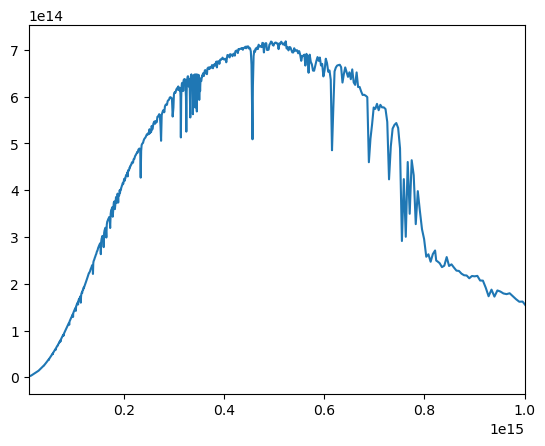

In [11]:
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_7250.fits') as kp00_7250:
    kp00_7250_table = Table(kp00_7250[1].data)
F0V_wave = np.array(kp00_7250_table['WAVELENGTH'])
F0V_spec = np.array(kp00_7250_table['g45'])
F0V_spec = np.multiply(F0V_spec,np.multiply(F0V_wave,F0V_wave))
F0V_wave = 10*c/(nm*F0V_wave)

plt.plot(F0V_wave, F0V_spec)
plt.xlim(0.01e+15,1e+15)

F0V_U=[]
F0V_B=[]
F0V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(F0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    F0V_U.append(F0V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(F0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    F0V_B.append(F0V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(F0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    F0V_V.append(F0V_spec[nearest_val_index])    

NumInt_F0V_U =  np.divide(np.multiply(F0V_U,USens),hv_U)
DemInt_F0V_U =  np.divide(USens,hv_U)
AV_F0V_U = integrate.simps(NumInt_F0V_U, UWave, even='avg')/integrate.simps(DemInt_F0V_U, UWave, even='avg')

NumInt_F0V_B =  np.divide(np.multiply(F0V_B,BSens),hv_B)
DemInt_F0V_B =  np.divide(BSens,hv_B)
AV_F0V_B = integrate.simps(NumInt_F0V_B, BWave, even='avg')/integrate.simps(DemInt_F0V_B, BWave, even='avg')

NumInt_F0V_V =  np.divide(np.multiply(F0V_V,VSens),hv_V)
DemInt_F0V_V =  np.divide(VSens,hv_V)
AV_F0V_V = integrate.simps(NumInt_F0V_V, VWave, even='avg')/integrate.simps(DemInt_F0V_V, VWave, even='avg')

U_B_F0V=-2.5*np.log10(AV_F0V_U/AV_F0V_B)
B_V_F0V=-2.5*np.log10(AV_F0V_B/AV_F0V_V)
U_V_F0V=-2.5*np.log10(AV_F0V_U/AV_F0V_V)  

print("U-B for F0V= " + str(U_B_F0V))
print("B-V for F0V= " + str(B_V_F0V))

U-B for A5V= 0.8242592146477056
B-V for A5V= 0.05858769944384348


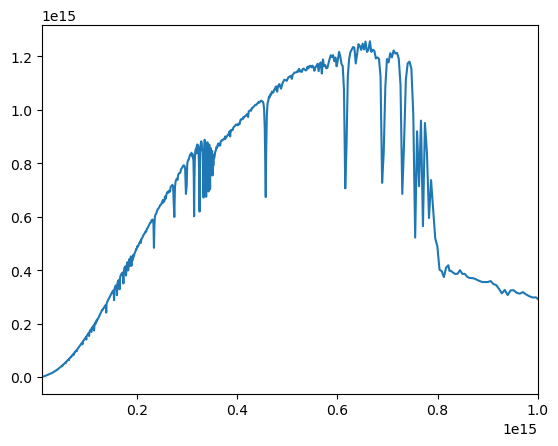

In [12]:
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_8250.fits') as kp00_8250:
    kp00_8250_table = Table(kp00_8250[1].data)
A5V_wave = np.array(kp00_8250_table['WAVELENGTH'])
A5V_spec = np.array(kp00_8250_table['g45'])
A5V_spec = np.multiply(A5V_spec,np.multiply(A5V_wave,A5V_wave))
A5V_wave = 10*c/(nm*A5V_wave)

plt.plot(A5V_wave, A5V_spec)
plt.xlim(0.01e+15,1e+15)

A5V_U=[]
A5V_B=[]
A5V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(A5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    A5V_U.append(A5V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(A5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    A5V_B.append(A5V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(A5V_wave-x)
    nearest_val_index=nearest_val.argmin()
    A5V_V.append(A5V_spec[nearest_val_index])    

NumInt_A5V_U =  np.divide(np.multiply(A5V_U,USens),hv_U)
DemInt_A5V_U =  np.divide(USens,hv_U)
AV_A5V_U = integrate.simps(NumInt_A5V_U, UWave, even='avg')/integrate.simps(DemInt_A5V_U, UWave, even='avg')

NumInt_A5V_B =  np.divide(np.multiply(A5V_B,BSens),hv_B)
DemInt_A5V_B =  np.divide(BSens,hv_B)
AV_A5V_B = integrate.simps(NumInt_A5V_B, BWave, even='avg')/integrate.simps(DemInt_A5V_B, BWave, even='avg')

NumInt_A5V_V =  np.divide(np.multiply(A5V_V,VSens),hv_V)
DemInt_A5V_V =  np.divide(VSens,hv_V)
AV_A5V_V = integrate.simps(NumInt_A5V_V, VWave, even='avg')/integrate.simps(DemInt_A5V_V, VWave, even='avg')

U_B_A5V=-2.5*np.log10(AV_A5V_U/AV_A5V_B)
B_V_A5V=-2.5*np.log10(AV_A5V_B/AV_A5V_V)
U_V_A5V=-2.5*np.log10(AV_A5V_U/AV_A5V_V)  

print("U-B for A5V= " + str(U_B_A5V))
print("B-V for A5V= " + str(B_V_A5V))

U-B for A0V= 0.7750996478510291
B-V for A0V= -0.12556413886490306


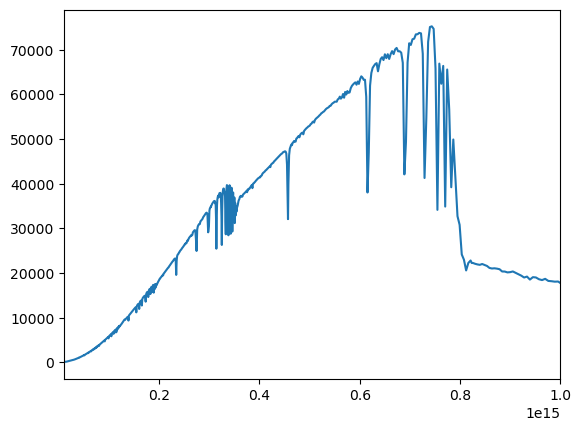

In [13]:
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_9500.fits') as kp00_9500:
    kp00_9500_table = Table(kp00_9500[1].data)
A0V_wave = np.array(kp00_9500_table['WAVELENGTH'])
A0V_spec = np.array(kp00_9500_table['g40']/c)
A0V_spec = np.multiply(A0V_spec,np.multiply(A0V_wave,A0V_wave))
A0V_wave = 10*c/(nm*A0V_wave)

plt.plot(A0V_wave, A0V_spec)
plt.xlim(0.01e+15,1e+15)

A0V_U=[]
A0V_B=[]
A0V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(A0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    A0V_U.append(A0V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(A0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    A0V_B.append(A0V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(A0V_wave-x)
    nearest_val_index=nearest_val.argmin()
    A0V_V.append(A0V_spec[nearest_val_index])    

NumInt_A0V_U =  np.divide(np.multiply(A0V_U,USens),hv_U)
DemInt_A0V_U =  np.divide(USens,hv_U)
AV_A0V_U = integrate.simps(NumInt_A0V_U, UWave, even='avg')/integrate.simps(DemInt_A0V_U, UWave, even='avg')

NumInt_A0V_B =  np.divide(np.multiply(A0V_B,BSens),hv_B)
DemInt_A0V_B =  np.divide(BSens,hv_B)
AV_A0V_B = integrate.simps(NumInt_A0V_B, BWave, even='avg')/integrate.simps(DemInt_A0V_B, BWave, even='avg')

NumInt_A0V_V =  np.divide(np.multiply(A0V_V,VSens),hv_V)
DemInt_A0V_V =  np.divide(VSens,hv_V)
AV_A0V_V = integrate.simps(NumInt_A0V_V, VWave, even='avg')/integrate.simps(DemInt_A0V_V, VWave, even='avg')

U_B_A0V=-2.5*np.log10(AV_A0V_U/AV_A0V_B)
B_V_A0V=-2.5*np.log10(AV_A0V_B/AV_A0V_V)
U_V_A0V=-2.5*np.log10(AV_A0V_U/AV_A0V_V)  

print("U-B for A0V= " + str(U_B_A0V))
print("B-V for A0V= " + str(B_V_A0V))

U-B for B8V= 0.47496520426692557
B-V for B8V= -0.22369803605145772


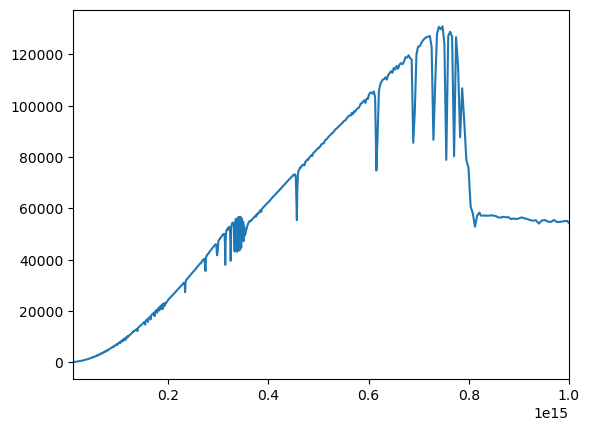

In [14]:
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_12000.fits') as kp00_12000:
    kp00_12000_table = Table(kp00_12000[1].data)
B8V_wave = np.array(kp00_12000_table['WAVELENGTH'])
B8V_spec = np.array(kp00_12000_table['g40']/c)
B8V_spec = np.multiply(B8V_spec,np.multiply(B8V_wave,B8V_wave))
B8V_wave = 10*c/(nm*B8V_wave)

plt.plot(B8V_wave, B8V_spec)
plt.xlim(0.01e+15,1e+15)

B8V_U=[]
B8V_B=[]
B8V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(B8V_wave-x)
    nearest_val_index=nearest_val.argmin()
    B8V_U.append(B8V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(B8V_wave-x)
    nearest_val_index=nearest_val.argmin()
    B8V_B.append(B8V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(B8V_wave-x)
    nearest_val_index=nearest_val.argmin()
    B8V_V.append(B8V_spec[nearest_val_index])    

NumInt_B8V_U =  np.divide(np.multiply(B8V_U,USens),hv_U)
DemInt_B8V_U =  np.divide(USens,hv_U)
AV_B8V_U = integrate.simps(NumInt_B8V_U, UWave, even='avg')/integrate.simps(DemInt_B8V_U, UWave, even='avg')

NumInt_B8V_B =  np.divide(np.multiply(B8V_B,BSens),hv_B)
DemInt_B8V_B =  np.divide(BSens,hv_B)
AV_B8V_B = integrate.simps(NumInt_B8V_B, BWave, even='avg')/integrate.simps(DemInt_B8V_B, BWave, even='avg')

NumInt_B8V_V =  np.divide(np.multiply(B8V_V,VSens),hv_V)
DemInt_B8V_V =  np.divide(VSens,hv_V)
AV_B8V_V = integrate.simps(NumInt_B8V_V, VWave, even='avg')/integrate.simps(DemInt_B8V_V, VWave, even='avg')

U_B_B8V=-2.5*np.log10(AV_B8V_U/AV_B8V_B)
B_V_B8V=-2.5*np.log10(AV_B8V_B/AV_B8V_V)
U_V_B8V=-2.5*np.log10(AV_B8V_U/AV_B8V_V)  

print("U-B for B8V= " + str(U_B_B8V))
print("B-V for B8V= " + str(B_V_B8V))

U-B for B3V= 0.06587700645676381
B-V for B3V= -0.32205855105963666


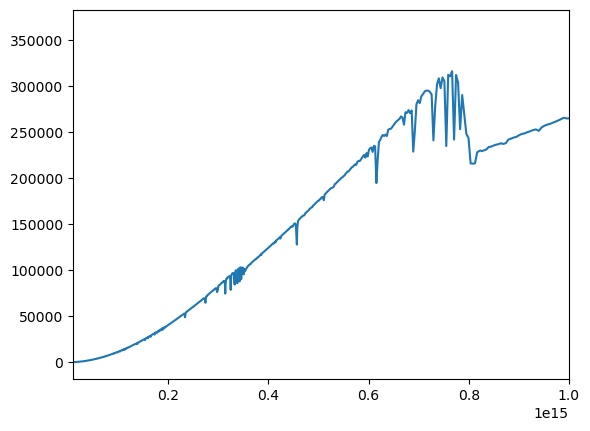

In [15]:
with fits.open(r'C:\Users\carte\Anaconda Projects\kp00\kp00_19000.fits') as kp00_19000:
    kp00_19000_table = Table(kp00_19000[1].data)
B3V_wave = np.array(kp00_19000_table['WAVELENGTH'])
B3V_spec = np.array(kp00_19000_table['g40']/c)
B3V_spec = np.multiply(B3V_spec,np.multiply(B3V_wave,B3V_wave))
B3V_wave = 10*c/(nm*B3V_wave)

plt.plot(B3V_wave, B3V_spec)
plt.xlim(0.01e+15,1e+15)

B3V_U=[]
B3V_B=[]
B3V_V=[]

for i  in range(0,23):
    x= c/(baseU + (float(i)*width))
    nearest_val= np.absolute(B3V_wave-x)
    nearest_val_index=nearest_val.argmin()
    B3V_U.append(B3V_spec[nearest_val_index])

for i  in range(0,41):
    x= c/(baseB + (float(i)*width))
    nearest_val= np.absolute(B3V_wave-x)
    nearest_val_index=nearest_val.argmin()
    B3V_B.append(B3V_spec[nearest_val_index])

for i  in range(0,47):
    x= c/(baseV + (float(i)*width))
    nearest_val= np.absolute(B3V_wave-x)
    nearest_val_index=nearest_val.argmin()
    B3V_V.append(B3V_spec[nearest_val_index])    

NumInt_B3V_U =  np.divide(np.multiply(B3V_U,USens),hv_U)
DemInt_B3V_U =  np.divide(USens,hv_U)
AV_B3V_U = integrate.simps(NumInt_B3V_U, UWave, even='avg')/integrate.simps(DemInt_B3V_U, UWave, even='avg')

NumInt_B3V_B =  np.divide(np.multiply(B3V_B,BSens),hv_B)
DemInt_B3V_B =  np.divide(BSens,hv_B)
AV_B3V_B = integrate.simps(NumInt_B3V_B, BWave, even='avg')/integrate.simps(DemInt_B3V_B, BWave, even='avg')

NumInt_B3V_V =  np.divide(np.multiply(B3V_V,VSens),hv_V)
DemInt_B3V_V =  np.divide(VSens,hv_V)
AV_B3V_V = integrate.simps(NumInt_B3V_V, VWave, even='avg')/integrate.simps(DemInt_B3V_V, VWave, even='avg')

U_B_B3V=-2.5*np.log10(AV_B3V_U/AV_B3V_B)
B_V_B3V=-2.5*np.log10(AV_B3V_B/AV_B3V_V)
U_V_B3V=-2.5*np.log10(AV_B3V_U/AV_B3V_V)  

print("U-B for B3V= " + str(U_B_B3V))
print("B-V for B3V= " + str(B_V_B3V))

Text(-0.32205855105963666, 0.2158770064567638, 'B3V')

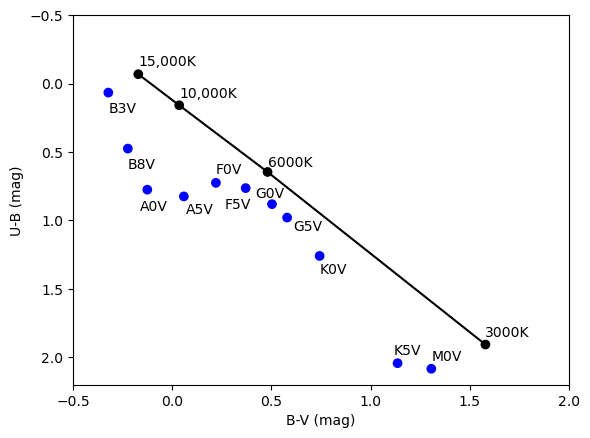

In [16]:
BVarr=[B_V_B3,B_V_B6,B_V_B10,B_V_B15,B_V_M0V,B_V_K5V,B_V_K0V,B_V_G5V,B_V_G0V,B_V_F5V,B_V_F0V,B_V_A5V,B_V_A0V,B_V_B8V,B_V_B3V]
UBarr=[U_B_B3,U_B_B6,U_B_B10,U_B_B15,U_B_M0V,U_B_K5V,U_B_K0V,U_B_G5V,U_B_G0V,U_B_F5V,U_B_F0V,U_B_A5V,U_B_A0V,U_B_B8V,U_B_B3V]
plt.scatter(BVarr,UBarr, c=['black','black','black','black','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue'])

BVarrBB=[B_V_B3,B_V_B6,B_V_B10,B_V_B15]
UBarrBB=[U_B_B3,U_B_B6,U_B_B10,U_B_B15]        
plt.plot(BVarrBB,UBarrBB, c='black')
plt.xlabel("B-V (mag)")
plt.ylabel("U-B (mag)")
plt.ylim([2.2, -0.5])
plt.xlim([-0.5, 2])
plt.text(B_V_B3,U_B_B3/1.03,'3000K')
plt.text(B_V_B6,U_B_B6/1.06,'6000K')
plt.text(B_V_B10,U_B_B10/1.5,'10,000K')
plt.text(B_V_B15,U_B_B15*1.9,'15,000K')
plt.text(B_V_M0V,U_B_M0V/1.03,'M0V')
plt.text(B_V_K5V/1.02,U_B_K5V/1.03,'K5V')
plt.text(B_V_K0V,U_B_K0V*1.1,'K0V')
plt.text(B_V_G5V*1.05,U_B_G5V*1.1,'G5V')
plt.text(B_V_G0V/1.2,U_B_G0V/1.06,'G0V')
plt.text(B_V_F5V/1.4,U_B_F5V*1.2,'F5V')
plt.text(B_V_F0V,U_B_F0V/1.1,'F0V')
plt.text(B_V_A5V*1.2,U_B_A5V*1.15,'A5V')
plt.text(B_V_A0V*1.3,U_B_A0V*1.2,'A0V')
plt.text(B_V_B8V,U_B_B8V+0.15,'B8V')
plt.text(B_V_B3V,U_B_B3V+0.15,'B3V')


##  Problem 4

In [17]:
#Distance 1 (short)
Ms=5.4e+11 #Msun
Rs=50 #kpc

#Distance 2 (far)
Mf=1.9e+12 #Msun
Rf=230 #kpc

In [18]:
def RHS(a):
    return (np.log((a+Rf)/a) - Rf/(Rf + a))/(np.log((a+Rs)/a) - Rs/(Rs + a))

def LHS(a):
    return (Mf*a)/(Ms*a)

Bounds = np.arange(0.01,30, 0.1)

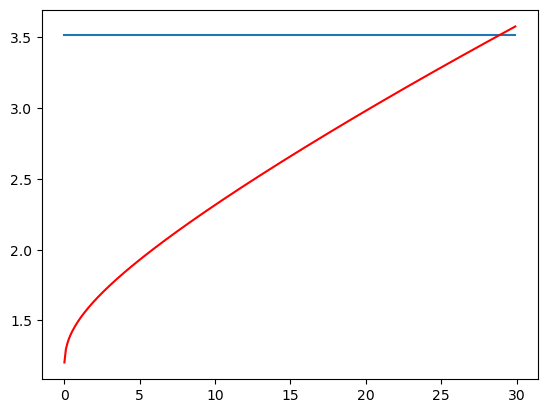

In [19]:
plt.plot(Bounds, LHS(Bounds))
plt.plot(Bounds, RHS(Bounds), 'r-');

In [20]:
def Fcn(a):
    return Mf/Ms - (np.log((a+Rf)/a) - Rf/(Rf + a))/(np.log((a+Rs)/a) - Rs/(Rs + a))

In [21]:
a = fsolve(Fcn, 25)
a[0]

28.892047648261574

In [22]:
from math import cos, exp, pi, cosh, log

hR= 3.5 #scale radius kpc
hz= .65 #scale height kpc
LB= 1.8e+10 #solar luminosity
RR= math.inf #total radius kpc
ZZ= 10000 # total height kpc

def f1(z):
    return 1/(cosh(z/hz)**2)

resz, errz= quad(f1, -100, 100)

print("The result of integrating over z is {:f} (+-{:g})"
    .format(resz, errz))

def f2(r):
    return r*exp(-r/hR)

resr, errr= quad(f2, 0, RR)

print("The result of integrating over r is {:f} (+-{:g})"
    .format(resr, errr))


l = symbols('l')
eq= 2*pi*resz*resr*l - LB

sol = solve(eq)
sol

The result of integrating over z is 1.300000 (+-1.04327e-10)
The result of integrating over r is 12.250000 (+-4.58944e-09)


[179892557.340918]

In [23]:
consz=resz*2*pi*sol[0]
consz

1469387755.10204

In [24]:
ac=a[0]
rhoc=1.9e+12/(4*pi*ac**3*(log((ac+230)/ac)-230/(230+ac)))

In [25]:
print(ac)
print(rhoc)
print(hR)
print(pi)
print(consz)

28.892047648261574
4805996.633034882
3.5
3.141592653589793
1469387755.10204


Text(0.5, 1.0, 'M(R)/L(R)')

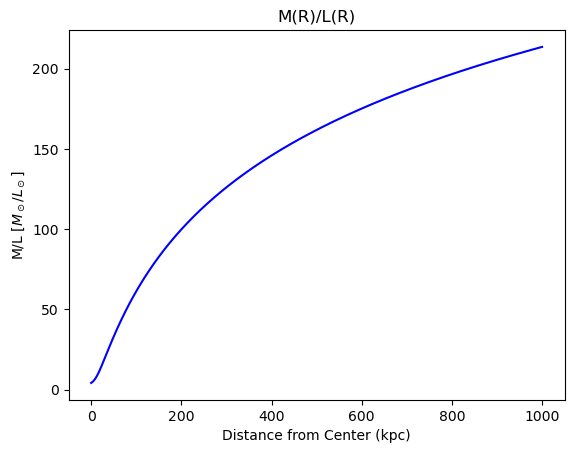

In [88]:
def ML(R):
    return 4*pi*rhoc*ac**3*(np.log((ac+R)/ac)-R/(R+ac))/(consz*(hR*hR-hR*(hR+R)*np.exp(-R/hR))) + 3

MLB = np.arange(0,1000, 0.1)

plt.plot(MLB, ML(MLB), '-b')
plt.xlabel('Distance from Center (kpc)')
plt.ylabel('M/L $[M_\odot/L_\odot]$')
plt.title('M(R)/L(R)')

In [27]:
print(ML(3))

4.80377488011822


In [28]:
print(ML(10))

7.16842040884278


In [29]:
print(ML(30))

19.4349546668839


In [30]:
print(ML(100))

61.2272506020269


In [31]:
print(ML(300))

125.999167395704


Text(0.5, 1.0, '$v_\\theta(R)$')

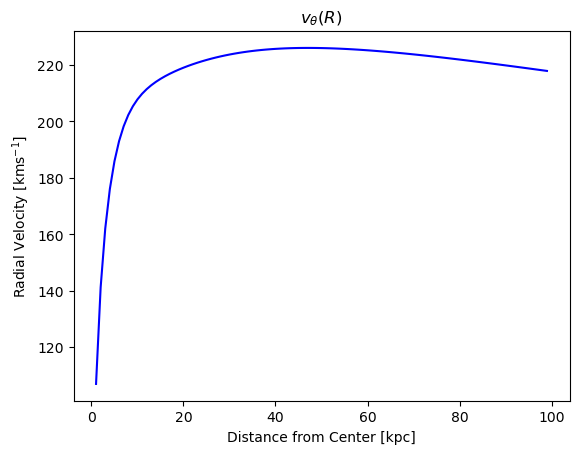

In [93]:
def MR(R):
    return 4*pi*rhoc*ac**3*(np.log((ac+R)/ac)-R/(R+ac))+3*(consz*(hR*hR-hR*(hR+R)*np.exp(-R/hR)))

solmass=1.989e+33 #g
gravcons=6.67e-8 #cm+3 g-1 s-2
cm2kpc=3.24e-22 #kpc
kpc2km=3.086e+16 #km
def vR(R):
    return (gravcons*cm2kpc**3*MR(R)*solmass/R)**(1/2)*kpc2km

vRB = np.arange(1,100)

plt.plot(vRB, vR(vRB), '-b')
plt.xlabel('Distance from Center [kpc]')
plt.ylabel('Radial Velocity [kms$^{-1}$]')
plt.title(r'$v_\theta(R)$')